#                                            ONLINE RETAIL dataset
                                                        Mrinmai Sharma
                                                           11603290
                                                Lovely Professional University

# Libraries used

In [2]:
import math
import datetime as dt
import numpy as np
import pandas
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC

# Load Dataset

In [3]:
source="OnlineRetail.xlsx"
dataset=pd.read_excel(source)
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Insight

In [4]:
dataset_copy=dataset
dataset.shape

(541909, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Missing data

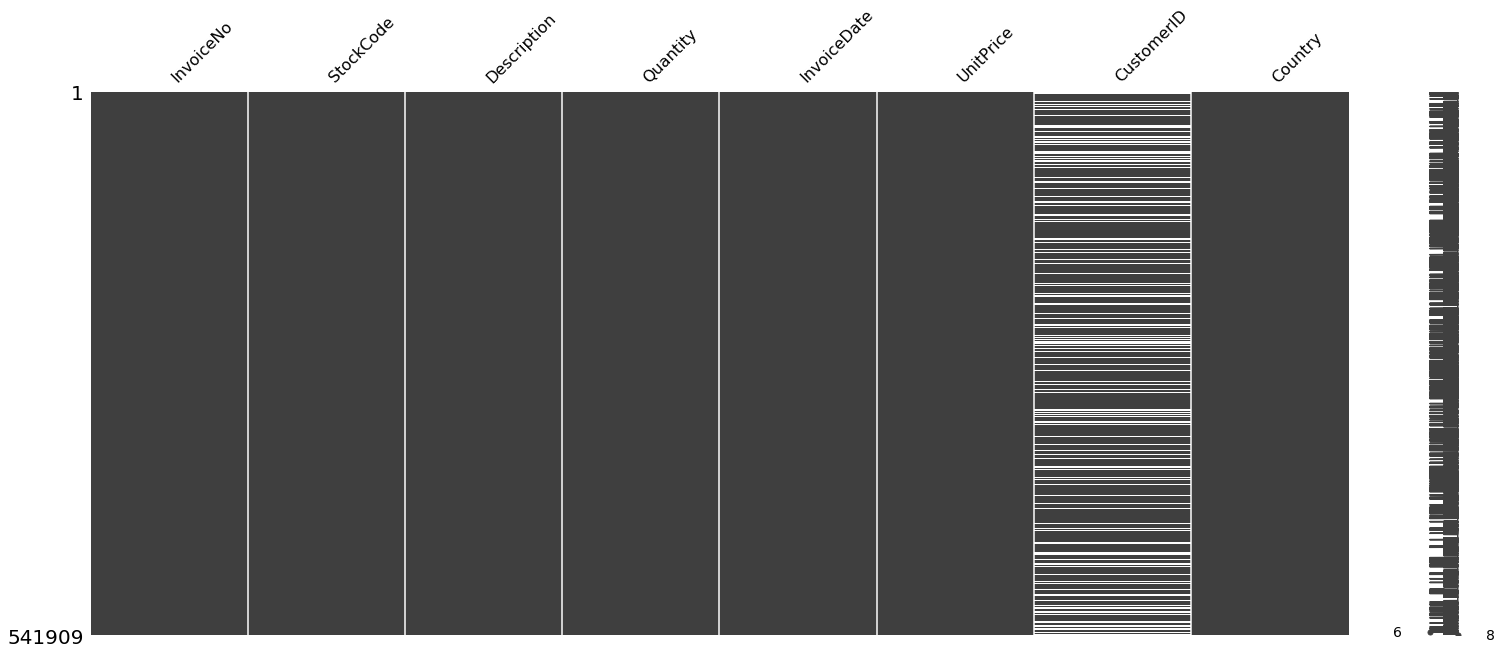

In [6]:
msno.matrix(dataset)

# Cleaning data

In [7]:
dataset=dataset.loc[pd.isnull(dataset.CustomerID) == False]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


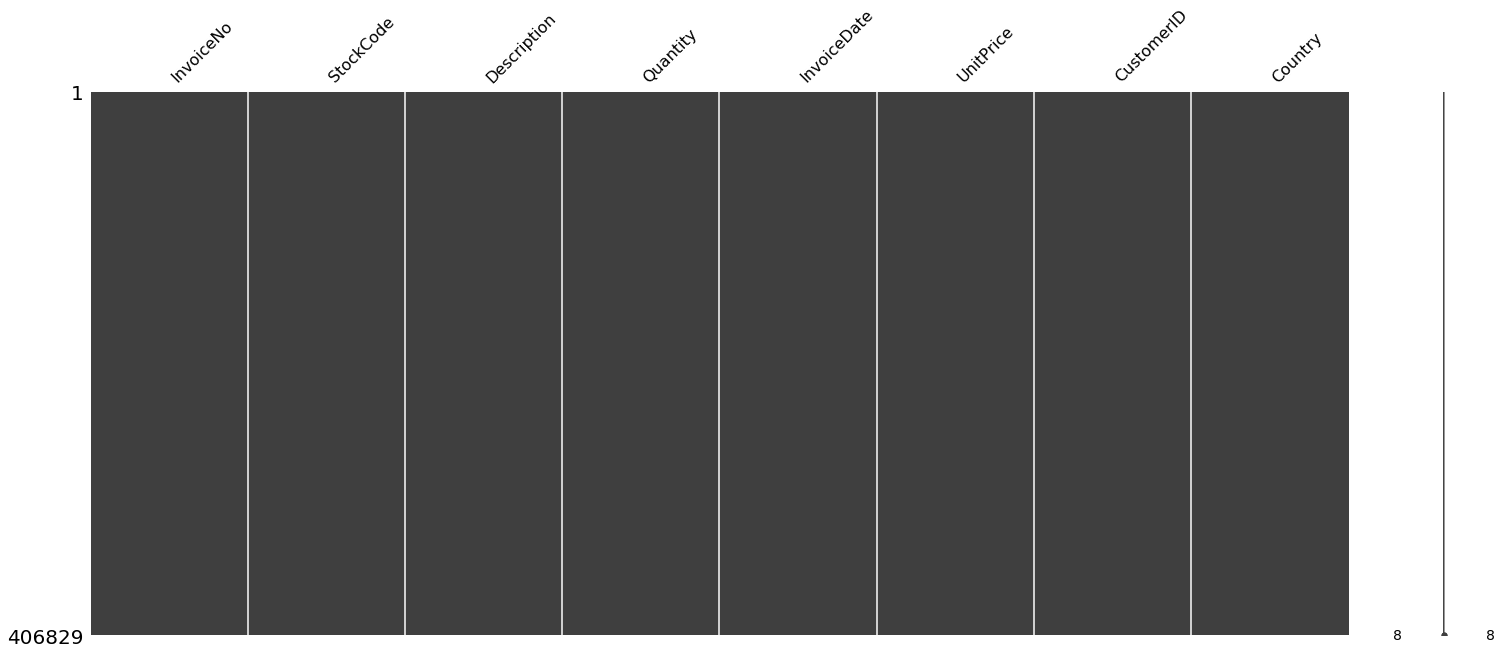

In [9]:
msno.matrix(dataset)

In [11]:
dataset.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,397924.0,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924
unique,18536.0,3665,3877,NaN,17286,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542.0,2035,2028,NaN,542,NaN,NaN,354345
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.021823,NaN,3.116174,15294.315171,NaN
std,NaN,NaN,NaN,180.420210,NaN,22.096788,1713.169877,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN


In [12]:
#remove canceled orders
dataset=dataset[dataset['Quantity']>0]

In [13]:
#remove rows where customerID are NA
dataset.dropna(subset=['CustomerID'],how='all',inplace=True)

In [14]:
dataset.shape

(397924, 8)

In [ ]:
#Summary

In [15]:
#exploring the unique values of each attribute
print("Number of transactions: ", dataset['InvoiceNo'].nunique())
print("Number of products bought: ",dataset['StockCode'].nunique())
print("Number of customers:", dataset['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(dataset['CustomerID'].isnull().sum() * 100 / len(dataset),2),"%" )

('Number of transactions: ', 18536)
('Number of products bought: ', 3665)
('Number of customers:', 4339)
('Percentage of customers NA: ', 0.0, '%')


# RFM Analysis

- RECENCY (R): Days since last purchase 
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

## Recency
To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

In [16]:
#last date available in our dataset
dataset['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [17]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [18]:
#create a new column called date which contains the only the date of invoice
dataset['date'] = dataset['InvoiceDate'].dt.date

In [19]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


#### Recency dataset

In [20]:
#group by customers and check last date of purshace
recency_data = dataset.groupby(by='CustomerID', as_index=False)['date'].max()
recency_data.columns = ['CustomerID','LastPurshaceDate']
recency_data.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [21]:
#calculate recency
recency_data['Recency'] = recency_data['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [22]:
recency_data.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [23]:
#drop LastPurchaseDate as we don't need it anymore
recency_data.drop('LastPurshaceDate',axis=1,inplace=True)

In [24]:
recency_data.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


## Frequency
Frequency helps us to know **how many times a customer purchased from us**. To do that we need to check how many invoices are registered by the same customer.

In [25]:
data_copy=dataset
# drop duplicates
data_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_data = data_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_data.columns = ['CustomerID','Frequency']
frequency_data.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary

Monetary attribute answers the question: **How much money did the customer spent over the time?**

In [26]:
#create column total cost
dataset['TotalCost'] = dataset['Quantity'] * dataset['UnitPrice']

In [27]:
monetary_data = dataset.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_data.columns = ['CustomerID','Monetary']
monetary_data.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


## Create RFM Table
Merge recency, frequency, monetary data

In [28]:
rfm_data = recency_data.merge(frequency_data.merge(monetary_data,on='CustomerID'),on='CustomerID')
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,163.16
2,12348.0,75,4,331.36
3,12349.0,18,1,15.00
4,12350.0,310,1,25.20


In [29]:
#use CustomerID as index
rfm_data.set_index('CustomerID',inplace=True)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20


## Applying 80-20 rule
Pareto’s rule says **80% of the results come from 20% of the causes**.

Similarly, **20% customers contribute to 80% of your total revenue**. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [30]:
#get the 80% of the revenue
pareto_cutoff = rfm_data['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

('The 80% of total revenue is: ', 1030117.18)


In [31]:
customers_rank = rfm_data
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,2.0
12347.0,2,7,163.16,889.0
12348.0,75,4,331.36,447.0
12349.0,18,1,15.00,3524.5
12350.0,310,1,25.20,2890.0


### Top customers

In [32]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,1.0
12346.0,325,1,77183.60,2.0
18102.0,0,60,42053.60,3.0
15098.0,182,3,39916.50,4.0
17949.0,1,45,29999.69,5.0
17450.0,8,46,26768.97,6.0
16029.0,38,63,24384.92,7.0
14646.0,1,74,19045.06,8.0
16013.0,3,47,17895.28,9.0


In [33]:
#get top 20% of the customers
top_20_cutoff = 4339 *0.2
top_20_cutoff

867.8000000000001

In [34]:
#sum the monetary values over the customer with rank <=867
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 867]['Monetary'].sum()
revenueByTop20

1125422.7999999998

The top 20% contribute to more than 80% of the revenue.

## Customer segmentation based on RFM score
I will give a score of 1 to 4 for the data in RFM model.

4 -> best/highest value

1 -> lowest/worst value

In [35]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,17.0,1.0,17.700,1085.5
0.50,50.0,2.0,47.000,2170.5
0.75,141.5,5.0,130.045,3260.0


In [36]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 47.0, 0.75: 130.04500000000002},
 'Rank': {0.25: 1085.5, 0.5: 2170.5, 0.75: 3260.0},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

**Note:** it is clear that:-

Higher Recency is bad.

Higher Frequency, Monetary is profitting.
and vice-versa.

In [37]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [38]:
#create rfm segmentation table
rfm_segmentation = rfm_data
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [39]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4
12347.0,2,7,163.16,889.0,4,4,4
12348.0,75,4,331.36,447.0,2,3,4
12349.0,18,1,15.00,3524.5,3,1,1
12350.0,310,1,25.20,2890.0,1,1,2


In [40]:
#Combine the RFM scores
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114
12347.0,2,7,163.16,889.0,4,4,4,444
12348.0,75,4,331.36,447.0,2,3,4,234
12349.0,18,1,15.00,3524.5,3,1,1,311
12350.0,310,1,25.20,2890.0,1,1,2,112


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [41]:
#top 10 customers
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
18102.0,0,60,42053.60,3.0,4,4,4,444
17949.0,1,45,29999.69,5.0,4,4,4,444
17450.0,8,46,26768.97,6.0,4,4,4,444
14646.0,1,74,19045.06,8.0,4,4,4,444
16013.0,3,47,17895.28,9.0,4,4,4,444
16333.0,7,22,14418.96,10.0,4,4,4,444
15769.0,7,26,11752.64,12.0,4,4,4,444
14911.0,1,201,11071.48,13.0,4,4,4,444
12901.0,8,28,9230.45,14.0,4,4,4,444


In [42]:
#Classification based on these scores
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

('Best Customers: ', 401)
('Loyal Customers: ', 872)
('Big Spenders: ', 1085)
('Almost Lost: ', 66)
('Lost Customers: ', 11)
('Lost Cheap Customers: ', 415)


Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

**Best Customers -**: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

**At Risk**: Send them personalized emails to encourage them to shop.

reference: https://searchsalesforce.techtarget.com/definition/customer-segmentation

## Final data for prediction
Add a column called **CustomerClass** with values ('Best', 'Loyal', 'BigSpender', 'AlmostLost', 'Lost', 'LostCheap')


In [43]:
def classifier(CustomerID , RFMScore, F_Quartile, M_Quartile, data):
    if(data[RFMScore][CustomerID]=='444'):
        return 'Best'
    elif(data[F_Quartile][CustomerID]==4):
        return 'Loyal'
    elif(data[M_Quartile][CustomerID]==4):
        return 'BigSpenders'
    elif(data[RFMScore][CustomerID]=='244'):
        return 'AlmostLost'
    elif(data[RFMScore][CustomerID]=='144'):
        return 'Lost'
    elif(data[RFMScore][CustomerID]=='111'):
        return 'LostCheap'
    else:
        return 'Others'

In [44]:
rfm_data.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114
12347.0,2,7,163.16,889.0,4,4,4,444
12348.0,75,4,331.36,447.0,2,3,4,234
12349.0,18,1,15.00,3524.5,3,1,1,311
12350.0,310,1,25.20,2890.0,1,1,2,112


In [45]:
copy=rfm_data

In [46]:
copy['CustomerID']=copy.index

In [47]:
copy['CustomerClass']=copy['CustomerID'].apply(classifier, args=('RFMScore','F_Quartile', 'M_Quartile', rfm_data))

In [48]:
copy.head(10)

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerID,CustomerClass
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,12346.0,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,12347.0,Best
12348.0,75,4,331.36,447.0,2,3,4,234,12348.0,BigSpenders
12349.0,18,1,15.00,3524.5,3,1,1,311,12349.0,Others
12350.0,310,1,25.20,2890.0,1,1,2,112,12350.0,Others
12352.0,36,8,536.30,271.0,3,4,4,344,12352.0,Loyal
12353.0,204,1,19.90,3100.0,1,1,2,112,12353.0,Others
12354.0,232,1,20.80,3036.0,1,1,2,112,12354.0,Others
12355.0,214,1,30.00,2724.0,1,1,2,112,12355.0,Others


In [49]:
copy.drop('CustomerID',axis=1,inplace=True)

In [50]:
copy.head()

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,Best
12348.0,75,4,331.36,447.0,2,3,4,234,BigSpenders
12349.0,18,1,15.00,3524.5,3,1,1,311,Others
12350.0,310,1,25.20,2890.0,1,1,2,112,Others


In [51]:
import copy

In [52]:
final1=copy.deepcopy(rfm_data)

In [53]:
final2=copy.deepcopy(final1)

In [54]:
final2.drop('R_Quartile',axis=1,inplace=True)
final2.drop('F_Quartile',axis=1,inplace=True)
final2.drop('M_Quartile',axis=1,inplace=True)
final2.drop('RFMScore',axis=1,inplace=True)

In [55]:
final1.head(3)

,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2.0,1,1,4,114,BigSpenders
12347.0,2,7,163.16,889.0,4,4,4,444,Best
12348.0,75,4,331.36,447.0,2,3,4,234,BigSpenders


In [56]:
final2.drop('Rank',axis=1,inplace=True)

In [57]:
final2.head(3)

,Recency,Frequency,Monetary,CustomerClass
CustomerID,,,,
12346.0,325,1,77183.60,BigSpenders
12347.0,2,7,163.16,Best
12348.0,75,4,331.36,BigSpenders


## Final Datasets:
final1, final2

# Using SVM

In [58]:
final2['CustomerClass'].head()

CustomerID
12346.0    BigSpenders
12347.0           Best
12348.0    BigSpenders
12349.0         Others
12350.0         Others
Name: CustomerClass, dtype: object

In [59]:
final2.drop('CustomerClass',axis=1,inplace=True)

In [60]:
final2.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.260459,-0.033745
Frequency,-0.260459,1.000000,0.184143
Monetary,-0.033745,0.184143,1.000000


In [61]:
final2['Class']=final1['CustomerClass']
final2.head()

,Recency,Frequency,Monetary,Class
CustomerID,,,,
12346.0,325,1,77183.60,BigSpenders
12347.0,2,7,163.16,Best
12348.0,75,4,331.36,BigSpenders
12349.0,18,1,15.00,Others
12350.0,310,1,25.20,Others


In [62]:
final2.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.260459,-0.033745
Frequency,-0.260459,1.000000,0.184143
Monetary,-0.033745,0.184143,1.000000


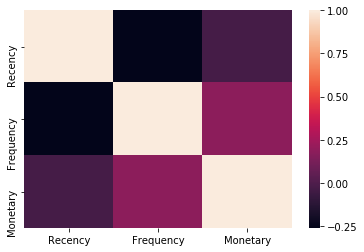

In [63]:
sns.heatmap(final2.corr())

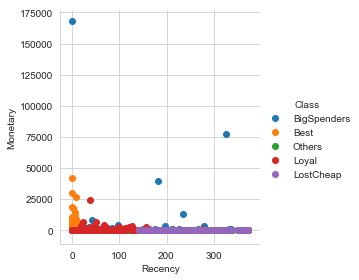

In [64]:
sns.set_style("whitegrid")
sns.FacetGrid(final2, hue="Class", height=4).map(plt.scatter, "Recency", "Monetary").add_legend()
plt.show()

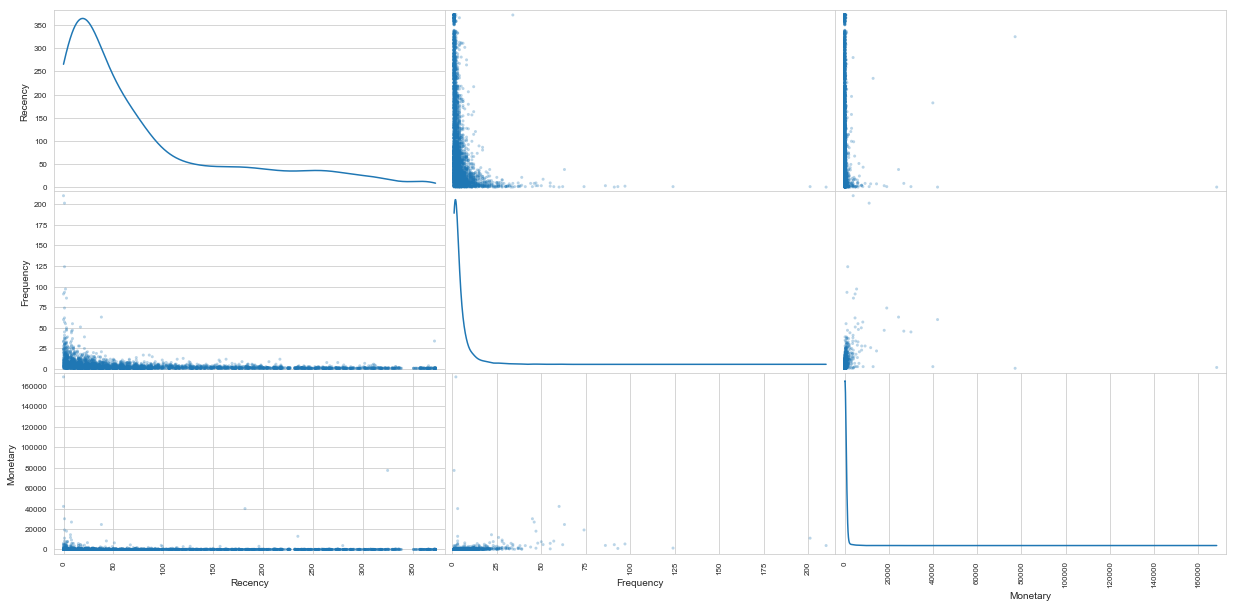

In [65]:
scatter_matrix(final2, alpha = 0.3, figsize = (21,10), diagonal = 'kde');

In [66]:
final2_r_log = np.log(final2['Recency']+0.1)
final2_f_log = np.log(final2['Frequency'])
final2_m_log = np.log(final2['Monetary']+0.1)
final2_c_log = final2['Class']

In [67]:
log_data=pd.DataFrame({'Monetary': final2_m_log,'Recency': final2_r_log,'Frequency': final2_f_log})

In [68]:
log_data['Class']=final2['Class']

In [69]:
log_data.head()

,Frequency,Monetary,Recency,Class
CustomerID,,,,
12346.0,0.000000,11.253944,5.784133,BigSpenders
12347.0,1.945910,5.095344,0.741937,Best
12348.0,1.386294,5.803507,4.318821,BigSpenders
12349.0,0.000000,2.714695,2.895912,Others
12350.0,0.000000,3.230804,5.736895,Others


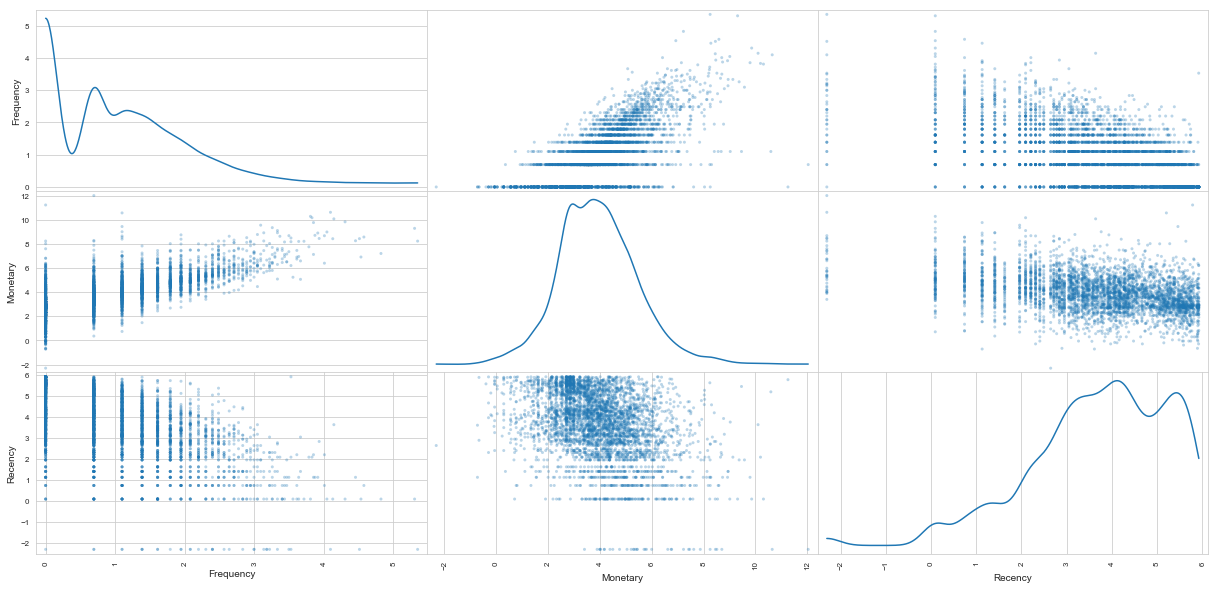

In [70]:
scatter_matrix(log_data, alpha = 0.3, figsize = (21,10), diagonal = 'kde');

In [71]:
array=log_data.values

In [72]:
X = array[:,0:2]
Y = array[:,3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Running SVM for different values of C

In [75]:
c=0.5;
#while(c<=10):
svm=SVC(kernel='rbf', C = c)
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
correct=0.0
for i in range(len(predictions)):
    if(predictions[i]==Y_validation[i]):
        correct+=1
accuracy=correct/len(predictions)
msg="C= %.1f -> accuracy = %f" % (c,accuracy)
print(msg)
#c+=0.1

C= 0.5 -> accuracy = 0.845622


In [74]:
svm=SVC(kernel='linear', C = c)
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
correct=0.0
for i in range(len(predictions)):
    if(predictions[i]==Y_validation[i]):
        correct+=1
accuracy=correct/len(predictions)
msg="C= %.1f -> accuracy = %f" % (c,accuracy)
print(msg)

C= 0.5 -> accuracy = 0.845622
